# CAPSTONE PROJECT: CREDIT CARD DEFAULT





    Center for Machine Learning and Intelligent Systems

default of credit card clients Data Set
Download: Data Folder, Data Set Description

Abstract: This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

Data Set Characteristics:  Multivariate

Number of Instances: 30000

Area: Business

Attribute Characteristics: Integer, Real

Number of Attributes: 24

Associated Tasks:

Classification

Missing Values?

N/A

Source:

Name: I-Cheng Yeh
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.
other contact information: 886-2-26215656 ext. 3181


Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.




In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [2]:
pwd

'C:\\Users\\fb8502oa\\Desktop\\Projects using Python'

In [3]:
#importing the data and looking at the first 10 and last 10 rows
default = pd.read_csv('C:/Users/fb8502oa/Desktop/Projects using Python/default of credit card clients.csv', header = 1)
default.head(10)
default.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [4]:
default.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

As you can see, some of the variables are int variables but are supposed to be factor variables.
Education, sex, marriage, pay and default payment next month.
Let's look at the Education levels for now.

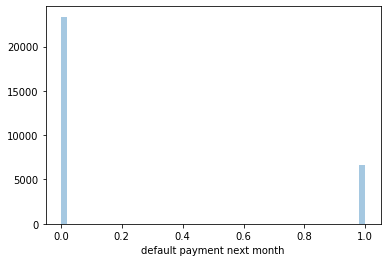

In [5]:
#looking at default 
import seaborn as sb
from matplotlib import pyplot as plt
sb.distplot(default['default payment next month'],kde = False)
plt.show()
#very few people are likely to default.
#data is imbalanced.

In [6]:

# Remaning the default variable name
default.rename(columns={'default payment next month':'DEFAULT'},inplace=True)

# DATA CLEANING TO FIT SKITLEARN FORMAT.

In [7]:
#separeting the education dummy variable features for skitlearn
#one-hot encoding for Education
default['GRAD_SCHOOL'] = (default['EDUCATION']==1).astype('int')
default['UNIVERSITY'] = (default['EDUCATION']==2).astype('int')
default['HIGH_SCHOOL'] = (default['EDUCATION']==3).astype('int')
default.drop('EDUCATION', axis =1, inplace = True)
default.head(10)

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL
0,1,20000,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,0,1,0
1,2,120000,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,0,1,0
2,3,90000,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,0
3,4,50000,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,0
4,5,50000,1,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,0,1,0
5,6,50000,1,2,37,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,1,0,0
6,7,500000,1,2,29,0,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,1,0,0
7,8,100000,2,2,23,0,-1,-1,0,0,...,380,601,0,581,1687,1542,0,0,1,0
8,9,140000,2,1,28,0,0,2,0,0,...,3329,0,432,1000,1000,1000,0,0,0,1
9,10,20000,1,2,35,-2,-2,-2,-2,-1,...,0,0,0,13007,1122,0,0,0,0,1


In [8]:
#separeting the sex dummy variable features for skitlearn
#one-hot encoding for sex

default['MALE']= (default['SEX']==1).astype('int')
default.drop('SEX', axis = 1, inplace = True)
default.head(10)

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,0,1,0,0
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,0,1,0,0
2,3,90000,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,1,0,0
3,4,50000,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,1,0,1
5,6,50000,2,37,0,0,0,0,0,0,...,1815,657,1000,1000,800,0,1,0,0,1
6,7,500000,2,29,0,0,0,0,0,0,...,40000,38000,20239,13750,13770,0,1,0,0,1
7,8,100000,2,23,0,-1,-1,0,0,-1,...,601,0,581,1687,1542,0,0,1,0,0
8,9,140000,1,28,0,0,2,0,0,0,...,0,432,1000,1000,1000,0,0,0,1,0
9,10,20000,2,35,-2,-2,-2,-2,-1,-1,...,0,0,13007,1122,0,0,0,0,1,1


In [9]:
#separeting the married and pay dummy variable features for skitlearn
#one-hot encoding for marriage
default['MARRIED'] = (default['MARRIAGE']==1).astype('int')
default.drop('MARRIAGE', axis=1, inplace = True)
default.head(10)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,1,0,0,1
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1
5,6,50000,37,0,0,0,0,0,0,64400,...,657,1000,1000,800,0,1,0,0,1,0
6,7,500000,29,0,0,0,0,0,0,367965,...,38000,20239,13750,13770,0,1,0,0,1,0
7,8,100000,23,0,-1,-1,0,0,-1,11876,...,0,581,1687,1542,0,0,1,0,0,0
8,9,140000,28,0,0,2,0,0,0,11285,...,432,1000,1000,1000,0,0,0,1,0,1
9,10,20000,35,-2,-2,-2,-2,-1,-1,0,...,0,13007,1122,0,0,0,0,1,1,0


In [10]:
#dealing with the pay columns. anything less thaN 0 means it was not delayed.
#this is an assumption
PAY = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in PAY:
    default.loc[default[i]<=0, i] = 0
    
default.head(10)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,1,20000,24,2,2,0,0,0,0,3913,...,0,0,0,0,1,0,1,0,0,1
1,2,120000,26,0,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1
5,6,50000,37,0,0,0,0,0,0,64400,...,657,1000,1000,800,0,1,0,0,1,0
6,7,500000,29,0,0,0,0,0,0,367965,...,38000,20239,13750,13770,0,1,0,0,1,0
7,8,100000,23,0,0,0,0,0,0,11876,...,0,581,1687,1542,0,0,1,0,0,0
8,9,140000,28,0,0,2,0,0,0,11285,...,432,1000,1000,1000,0,0,0,1,0,1
9,10,20000,35,0,0,0,0,0,0,0,...,0,13007,1122,0,0,0,0,1,1,0


# MODELING

In [11]:
import itertools
import matplotlib.ticker as ticker
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter

In [12]:
#looking at default values so that we know their real classification
default['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [13]:
#default.columns
#x variables
X = default[['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'GRAD_SCHOOL',
       'UNIVERSITY', 'HIGH_SCHOOL', 'MALE', 'MARRIED']]
X[0:5]


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,1,20000,24,2,2,0,0,0,0,3913,...,689,0,0,0,0,0,1,0,0,1
1,2,120000,26,0,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,0,0,1
4,5,50000,57,0,0,0,0,0,0,8617,...,36681,10000,9000,689,679,0,1,0,1,1


In [14]:
#y variable
y = default['DEFAULT'].values
y[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
#The x variables have values ranging from 0 to some that have more than 1000. 
#scaling is important
X =preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.73199307, -1.13672015, -1.24601985,  2.16049607,  2.0954688 ,
        -0.38461417, -0.33999038, -0.30862144, -0.31668782, -0.64250107,
        -0.64739923, -0.66799331, -0.67249727, -0.66305853, -0.65272422,
        -0.34194162, -0.22708564, -0.29680127, -0.30806256, -0.31413612,
        -0.29338206, -0.73837457,  1.06689977, -0.44275183, -0.81016074,
         1.09377971],
       [-1.7318776 , -0.3659805 , -1.02904717, -0.46907093,  2.0954688 ,
        -0.38461417, -0.33999038, -0.30862144,  2.47884979, -0.65921875,
        -0.66674657, -0.63925429, -0.62163594, -0.60622927, -0.59796638,
        -0.34194162, -0.21358766, -0.24000461, -0.24422965, -0.31413612,
        -0.18087821, -0.73837457,  1.06689977, -0.44275183, -0.81016074,
        -0.91426088],
       [-1.73176213, -0.59720239, -0.16115646, -0.46907093, -0.39918641,
        -0.38461417, -0.33999038, -0.30862144, -0.31668782, -0.29855966,
        -0.49389911, -0.48240819, -0.44973025, -0.41718767, -0.39162956,
       

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (22500, 26) (22500,)
Test set:  (7500, 26) (7500,)


# MODEL 1. K NEAREST NEIGHBOR (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [18]:
#lets start with k= 2
k=2 
#model 
DFneigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
DFneigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [19]:
yhat = DFneigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [20]:
#accuracy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print('Train set Accuracy: ', metrics.accuracy_score(y_train, DFneigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))
F1_score = f1_score(y_test, yhat, average = 'weighted')
print("the F1 score is: ", F1_score)

Train set Accuracy:  0.8622222222222222
Test set Accuracy:  0.7869333333333334
the F1 score is:  0.7509774176922918


In [21]:
from sklearn import metrics
#How i got 7 as the best k 
ks = 4
mean_acc= np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusionMx = [];
for n in range (1, ks):
    #Train model and predict
    neighb = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neighb.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
mean_acc


array([0.72906667, 0.78693333, 0.77906667])

In [22]:

#printing the best k 
print("the best accuracy was with ", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

the best accuracy was with  0.7869333333333334 with k =  2


In [23]:
## ACCURACY REPORT

In [24]:
#since my model started with the optimal number of k, lets look at the report 
#the report
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[5215  626]
 [1031  628]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5841
           1       0.50      0.38      0.43      1659

    accuracy                           0.78      7500
   macro avg       0.67      0.64      0.65      7500
weighted avg       0.76      0.78      0.77      7500



# MODEL 2: DECISION TREE

In [25]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier 

In [26]:
DFtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
DFtree

#fitting the model 
DFtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
predTree = DFtree.predict(X_test)
predTree[0:5]
print(y_test[0:5])

[1 0 0 1 0]


In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DesicionTree's accuracy: ", metrics.accuracy_score(y_test, predTree))

DesicionTree's accuracy:  0.8206666666666667


In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predTree)

from sklearn.metrics import f1_score
F1_score = f1_score(y_test, predTree, average='weighted')
F1_score

C:\Users\fb8502oa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7964945531185924

In [30]:
## ACCURACY REPORT

In [31]:
#Evaluation for f1 score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predTree))
print(classification_report(y_test, predTree))

[[5586  255]
 [1090  569]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5841
           1       0.69      0.34      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



# MODEL 3: SUPPORT VECTOR MACHINE

In [32]:
#importing libraries
import pylab as pl
from sklearn import svm

In [33]:
## TRAINING THE MODEL
DFsvm = svm.SVC(kernel = "rbf", gamma = 'scale')
DFsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
#prediction 
yhat1 =DFsvm.predict(X_test)
yhat1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
#evaluation of the model usinf sklearn 
from sklearn import metrics
print("Accuracy is: ", metrics.accuracy_score(y_test, yhat1))

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat1)


#finding the f1 score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, yhat1, average='weighted')
F1_score

Accuracy is:  0.8205333333333333


C:\Users\fb8502oa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7973709158933487

In [36]:
#report
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.68      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



# MODEL 4: LOGISTIC REGRESSION

In [37]:
#importing libaries
import scipy.optimize as opt
#the data has already been split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [38]:
LR = LogisticRegression(C= 0.01, solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#prediction 
yhat2 = LR.predict(X_test)
yhat2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
#estimates for all classes 
yhat2_prob = LR.predict_proba(X_test)
yhat2_prob

array([[0.76528533, 0.23471467],
       [0.90153763, 0.09846237],
       [0.8496299 , 0.1503701 ],
       ...,
       [0.82469029, 0.17530971],
       [0.83185522, 0.16814478],
       [0.79754973, 0.20245027]])

In [41]:

#evaluation 
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat2)

C:\Users\fb8502oa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8217333333333333

In [42]:
#finding the f1 score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, yhat2, average='weighted')
F1_score

0.7977049944383331

In [43]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5841
           1       0.70      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500



# MODEL 5: NAIVE BAYES CLASSIFIER

In [44]:
#library
from sklearn.naive_bayes import GaussianNB

In [45]:
NBC = GaussianNB()
NBC.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
#predictions 
ypred = NBC.predict(X_test)

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, ypred)

C:\Users\fb8502oa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7685333333333333

In [48]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, ypred, average='weighted')
F1_score

0.7753048652027592

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns = ['KNNeigh', 'Desc_Trees', 'SVM', 'LogisticReg', 'NaiveB','NeuralNet'])
ypred = NBC.predict(X_test)

metrics.loc['accuracy', 'NaiveB'] = accuracy_score(ypred, y_test)
metrics.loc['precision', 'NaiveB'] = precision_score(ypred, y_test)
metrics.loc['recall', 'NaiveB'] = recall_score(ypred, y_test)

# MODEL 6: NEURAL NETWORKS

In [50]:
# libraries 
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[16603   920]
 [ 3086  1891]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17523
           1       0.67      0.38      0.49      4977

    accuracy                           0.82     22500
   macro avg       0.76      0.66      0.69     22500
weighted avg       0.81      0.82      0.80     22500



In [53]:
## ACCURACY REPORT

In [54]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[5515  326]
 [1015  644]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.66      0.39      0.49      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.67      0.69      7500
weighted avg       0.80      0.82      0.80      7500



# THE BEST MODEL

## The best model is logistic regression with: % metrics

Accuracy 82.17%

Precision 70%

Recall 35%

## Naive Bayes has the best recall: % metrics

Accuracy 76.85%

Precision 57.08%

Recall 48.05%

In [55]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test,yhat2)


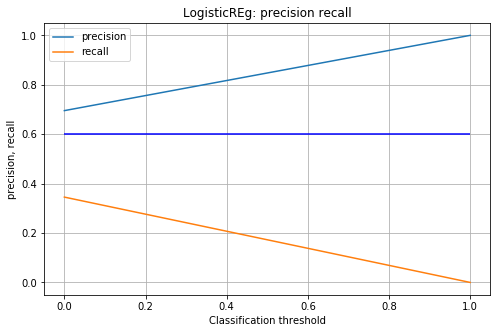

In [56]:
#trying to adjust the model 
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label = 'precision')
ax.plot(thresholds_lr, recall_lr[1:], label = 'recall')
ax.set_xlabel('Classification threshold')
ax.set_ylabel('precision, recall')
ax.set_title('LogisticREg: precision recall')
ax.hlines(y=0.6, xmin =0, xmax=1, color ='Blue')
ax.legend()
ax.grid();

In [57]:
#dealing with thres
yhatz = LR.predict_proba(X_test)[:,1]
ypredtest = (yhatz>=0.25).astype('int')
print(classification_report(y_test,ypredtest ))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5841
           1       0.52      0.56      0.54      1659

    accuracy                           0.79      7500
   macro avg       0.70      0.71      0.70      7500
weighted avg       0.80      0.79      0.79      7500



# RECALL EXPLAINATION

# PREDICTION FOR A CUSTOMER.
NEW DATA.

In [58]:
#RAW DATA
ID = 2
LIMIT_BAL= 6000
AGE= 24                    
BILL_AMT1= 608
BILL_AMT2= 57800
BILL_AMT3= 500                       
BILL_AMT4= 1000
BILL_AMT5= 600
BILL_AMT6= 1000
PAY_AMT1=6000                 
PAY_AMT2= 50
PAY_AMT3= 0
PAY_AMT4= 0
PAY_AMT5= 0
PAY_AMT6=0
MALE=-1
GRAD_SCHOOL= 1 
UNIVERSITY= 0 
HIGH_SCHOOL= 0 
MARRIED= 1
PAY_0= 0 
PAY_2= 0
PAY_3= 0 
PAY_4= 0 
PAY_5= 1
PAY_6= 0

In [59]:
#default.drop('ID', axis =1)
prediction = LR.predict([[ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,
                          BILL_AMT3,BILL_AMT4,BILL_AMT5,
                          BILL_AMT6,PAY_AMT1,PAY_AMT2,
                          PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,
                          GRAD_SCHOOL, UNIVERSITY,HIGH_SCHOOL,MARRIED,PAY_0,
                          PAY_2,PAY_3,PAY_4,PAY_5,PAY_6]])

probability = LR.predict_proba([[ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,
                          BILL_AMT3,BILL_AMT4,BILL_AMT5,
                          BILL_AMT6,PAY_AMT1,PAY_AMT2,
                          PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,
                          GRAD_SCHOOL, UNIVERSITY,HIGH_SCHOOL,MARRIED,PAY_0,
                          PAY_2,PAY_3,PAY_4,PAY_5,PAY_6]])

prediction = prediction[0]
probability = float(probability[0][1])

#features = [ 'LIMIT_BAL' , 'SEX' , 'EDUCATION' , 'MARRIAGE','AGE','PAY_MAX_SCORE','BILL_AV_AMT', 'PAY_AMT_AV', 'AVAILABLE_CRED_PERCENT']
#prints predictions


##trying with another formular.

In [60]:
def pred(prediction):
    if prediction >=0.25:
        return 'will default'
    else:
        return 'will pay'

In [61]:
pred(prediction)

'will default'

In [62]:
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
#scaler = StandardScaler()

def ind_prediction(newdata):
    data = newdata.values.reshape(1,-1)
    data = preprocessing.StandardScaler().fit(data).transform(data)
    prob = LR.predict_proba(data)[0][1]
    if prob >=0.25:
        return 'default'
    else:
        return 'will pay'

In [63]:
pay = default[default['DEFAULT']==0]
pay.head(10)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1
5,6,50000,37,0,0,0,0,0,0,64400,...,657,1000,1000,800,0,1,0,0,1,0
6,7,500000,29,0,0,0,0,0,0,367965,...,38000,20239,13750,13770,0,1,0,0,1,0
7,8,100000,23,0,0,0,0,0,0,11876,...,0,581,1687,1542,0,0,1,0,0,0
8,9,140000,28,0,0,2,0,0,0,11285,...,432,1000,1000,1000,0,0,0,1,0,1
9,10,20000,35,0,0,0,0,0,0,0,...,0,13007,1122,0,0,0,0,1,1,0
10,11,200000,34,0,0,2,0,0,0,11073,...,50,300,3738,66,0,0,0,1,0,0
11,12,260000,51,0,0,0,0,0,2,12261,...,8583,22301,0,3640,0,1,0,0,0,0


In [64]:
from collections import OrderedDict
new_cust = OrderedDict([('ID', 0),('LIMIT_BAL', 4000), ('AGE', 50), ('BILL_AMT1', 500),
                        ('BILL_AMT2',35509), ('BILL_AMT3',689), ('BILL_AMT4', 0), 
                        ('BILL_AMT5', 0), ('BILL_AMT6',0),('PAY_AMT1',0), ('PAY_AMT2', 35509),
                        ('PAY_AMT3', 0), ('PAY_AMT4',0), ('PAY_AMT5',0), ('PAY_AMT6',0),('MALE',1),
                        ('GRAD_SCHOOL',0), ('UNIVERSITY',1),
                        ('HIGH_SCHOOL',0), ('MARRIED',1), ('PAY_0',-1), ('PAY_2', -1),('PAY_3', -1), 
                        ('PAY_4',0), ('PAY_5', -1), ('PAY_6',0)])
new_cust = pd.Series(new_cust)
ind_prediction(new_cust)

'will pay'